In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']

df = df[df['Country'].isin(countries)]

In [8]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

In [9]:
df = df.pivot(index='Date', columns='Country', values='Cases')

countries = list(df.columns)

covid = df.reset_index('Date')

covid.set_index(['Date'], inplace=True)

covid.columns = countries

In [10]:
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}

percapita = covid.copy()

for country in list(percapita.columns):

    percapita[country] = percapita[country]/populations[country]*100000

In [13]:
print(df)


Country     Canada   China  France  Germany      US  United Kingdom
Date                                                               
2020-01-22       0     593       0        0       1               0
2020-01-23       0     691       0        0       1               0
2020-01-24       0     982       2        0       2               0
2020-01-25       0    1487       3        0       2               0
2020-01-26       1    2180       3        0       5               0
2020-01-27       1    3017       3        1       5               0
2020-01-28       2    5741       4        4       5               0
2020-01-29       2    6340       5        4       5               0
2020-01-30       2    8447       5        4       5               0
2020-01-31       4   10229       5        5       7               2
2020-02-01       4   12425       6        8       8               2
2020-02-02       4   17454       6       10       8               2
2020-02-03       4   20755       6       12     

In [14]:
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}

plt.style.use('fivethirtyeight')

Text(0, 0.5, '# of Cases')

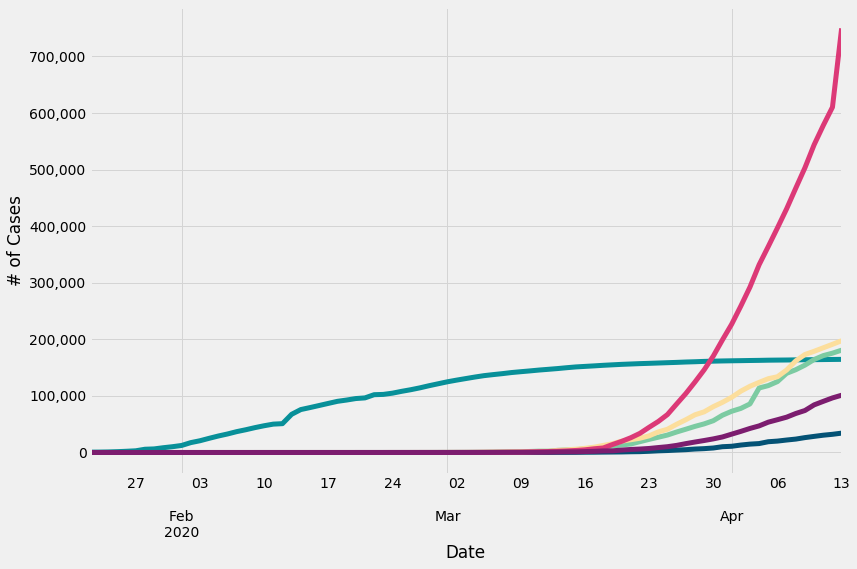

In [15]:
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)

plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plot.grid(color='#d4d4d4')

plot.set_xlabel('Date')

plot.set_ylabel('# of Cases')

In [16]:
for country in list(colors.keys()):

    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

In [18]:

plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)

plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)

plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

In [21]:
plt.show()